# Final Project - Training Data

This notebook loads and displays some examples from the training dataset.

The training dataset contains a total of 4190 samples. All teams have been given the same training dataset. Your final model and report must be implemented and written using this training set.

* You should expect the test dataset to have the same format as the training data: a folder with test images, and another folder with the respective coordinate txt files.

Remember that *any* pre-processing applied in the training data should also be applied in the test data.

In [2]:
import numpy as np
import numpy.random as npr
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import cv2

In [3]:
# Loading Data
training_images_path = "Training Set/Training Images"
training_coordinates_path = "Training Set/Training Coordinates"

training_images = np.array(os.listdir(training_images_path))[1:]

training_images.shape

(4190,)

In [8]:
## Utility functions

def load_yolo_labels(label_file):
    """ Load YOLO labels from a file. """
    with open(label_file, 'r') as f:
        labels = f.readlines()
    return [list(map(float, label.strip().split())) for label in labels]

def convert_to_pixel_coordinates(yolo_bbox, image_width, image_height):
    """ Convert YOLO normalized bounding box to pixel coordinates. """
    
    x_center, y_center, w, h = yolo_bbox[0], yolo_bbox[1], yolo_bbox[2], yolo_bbox[3]

    
    # Convert to pixel values
    x_center *= image_width
    y_center *= image_height
    w *= image_width
    h *= image_height
    
    # Calculate the top-left and bottom-right corners
    x1 = x_center - w / 2
    y1 = y_center - h / 2
    x2 = x_center + w / 2
    y2 = y_center + h / 2
    
    return x1, y1, x2, y2

def plot_bounding_boxes(image_path, label_file):
    """ Plot bounding boxes from YOLO label file on an image. """
    # Load image
    image = cv2.imread(image_path)
    image_height, image_width, _ = image.shape
    
    # Load YOLO labels
    labels = load_yolo_labels(label_file)
    print(labels)
    # Plot bounding boxes
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax = plt.gca()
    
    for label in labels:
        class_id, *bbox = label
        x1, y1, x2, y2 = convert_to_pixel_coordinates(bbox, image_width, image_height)
        
        # Draw the bounding box on the image
        ax.add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, 
                                   linewidth=2, edgecolor='red', facecolor='none'))
        ax.text(x1, y1, f'Class {int(class_id)}', color='white', fontsize=12, 
                bbox=dict(facecolor='red', alpha=0.5))
    
    # Display the image
    plt.axis('off')
    # plt.show()

Image path: Training Set/Training Images/IMG_7766_resized.jpg
[[0.0, 0.276214, 0.662136, 0.214563, 0.220388]]
Image path: Training Set/Training Images/IMG_7067.jpg
[[3.0, 0.379791, 0.323043, 0.193885, 0.214765], [7.0, 0.730276, 0.66868, 0.220731, 0.203579]]
Image path: Training Set/Training Images/im23.jpg
[[9.0, 0.503234, 0.487063, 0.182406, 0.182406]]
Image path: Training Set/Training Images/IMG_20241023_195015.jpg
[[1.0, 0.242868, 0.258613, 0.167048, 0.215103]]
Image path: Training Set/Training Images/IMG_2276.jpg
[[0.0, 0.27785, 0.130181, 0.226684, 0.190415]]
Image path: Training Set/Training Images/inbound5741900741068760008.jpg
[[4.0, 0.461486, 0.157939, 0.064189, 0.130068], [7.0, 0.806081, 0.424831, 0.155405, 0.113176], [5.0, 0.469088, 0.669764, 0.092905, 0.079392]]
Image path: Training Set/Training Images/9.49.03.jpg
[[2.0, 0.438065, 0.445806, 0.557419, 0.832258]]
Image path: Training Set/Training Images/20241022_111505.jpg
[[9.0, 0.460742, 0.445211, 0.176877, 0.350302], [9.0, 

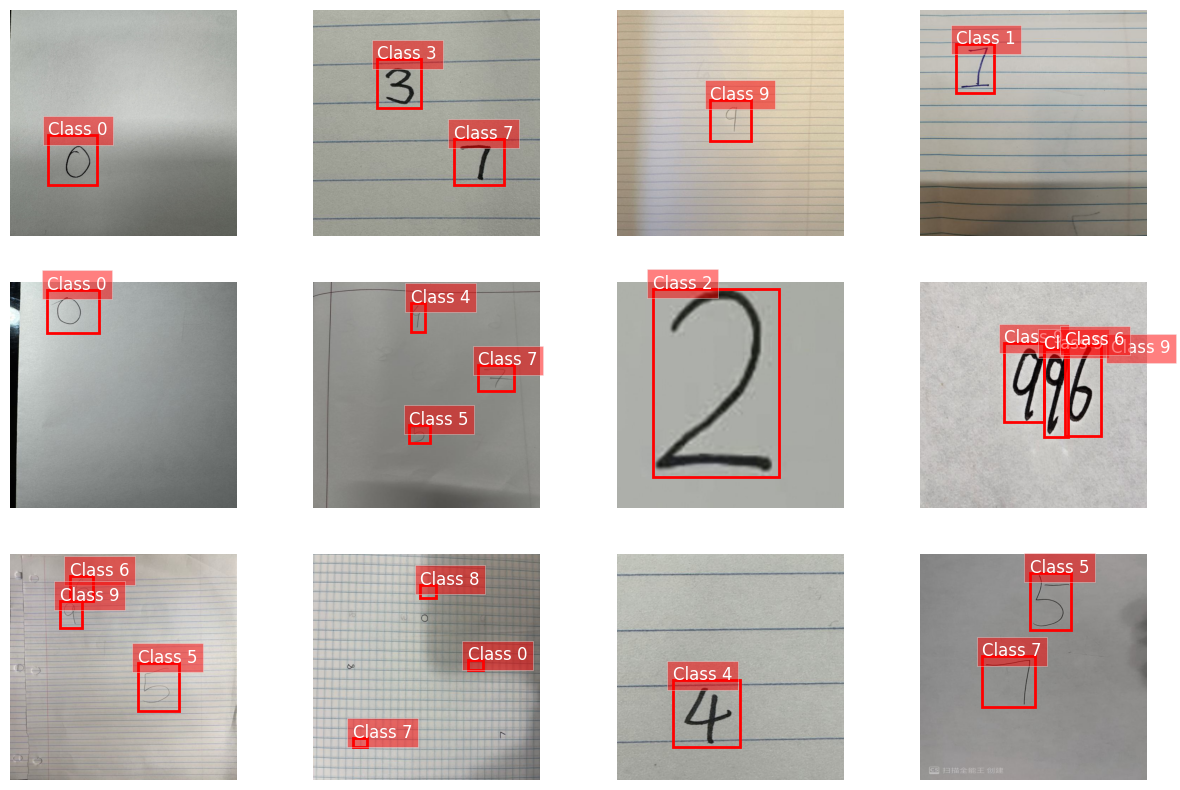

In [10]:
import random
import os
N=12
img_idx = np.array(random.sample(range(training_images.shape[0]), N))
plt.figure(figsize=(15,10))
for i in range(N):
    plt.subplot(3,4,i+1)
    image_path = training_images_path+'/'+training_images[img_idx[i]]  # Path to the image file
    print("Image path:", image_path) #Debug
    label_file = training_coordinates_path +'/'+ training_images[img_idx[i]].strip('.jpg')+'.txt' # Path to the corresponding YOLO label file    
    plot_bounding_boxes(image_path, label_file);

---